In [ ]:
                                                        Support Vector Machine

In [ ]:
#SVM (Support Vector Machine)?
#Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. 
#It is mainly used for binary classification problems like spam detection, fraud detection, and medical diagnosis.

#How SVM Works?
SVM finds the best decision boundary (hyperplane) that separates different classes.

Example: Classifying "Purchased" (1) vs. "Not Purchased" (0)
The model looks at Age and Estimated Salary.
It finds the best hyperplane that separates buyers from non-buyers.


#Key Concepts in SVM:
    
1️)Hyperplane (Decision Boundary)
In 2D space, a hyperplane is a straight line.
In 3D space, it is a plane.
In higher dimensions, it is a hyperplane.
The goal of SVM is to find the optimal hyperplane that separates classes with maximum margin.
    
2) Support Vectors
These are the closest data points to the hyperplane.
The hyperplane is determined by support vectors, not other points.

3) Margin
The distance between the hyperplane and the nearest support vectors.
SVM maximizes this margin to ensure the best separation.

    
#Types of SVM
1️) Linear SVM → When the data is linearly separable
2️) Non-Linear SVM → When the data is not separable by a straight line, we use the kernel trick.

    

#SVM Kernel Trick (For Non-Linear Data)
    
When data is not linearly separable, we map it to a higher dimension using kernels:
Linear Kernel  →  Used when the data is already separable with a straight line.
Polynomial Kernel  →  Maps the data into a higher-degree polynomial space.
Radial Basis Function (RBF) Kernel → Maps the data into infinite dimensions using Gaussian functions.
Sigmoid Kernel → Inspired by neural networks.   

In [3]:
#step 1 :import all the necessary liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#The dataset contains information about users and whether they purchased a product or not based on social media ads.
#Dataset Columns
User ID (Dropped as it is irrelevant)
Gender → (Male or Female, categorical)
Age → (User’s age, numerical)
EstimatedSalary → (User’s estimated salary, numerical)
Purchased → (0 = No Purchase, 1 = Purchased, target variable)

#Goal of the Analysis
We aim to predict whether a user will purchase a product based on their gender, age, and estimated salary.
This is a classification problem, where Purchased is the target variable (0 or 1).
We use Support Vector Machine (SVM) to classify users into "Likely to Purchase" or "Not Likely to Purchase".

In [3]:
#Step2 :Load and Inspect the Dataset

In [5]:
# Load dataset
df = pd.read_csv(r"C:\Users\vaibh\Downloads\Social_Network_Ads.csv")

In [7]:
# Display first five rows
print(df.head())

    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0


In [9]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB
None


In [11]:
print(df.shape)

(400, 5)


In [15]:
#checking null value if any
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#Step 3: Data Preprocessing

In [17]:
 #Drop Unnecessary Columns
#The "User ID" column is not useful for prediction, so we drop it.
df = df.drop(columns=['User ID'])

In [25]:
print(df.head())

   Gender   Age  EstimatedSalary  Purchased
0    Male  19.0          19000.0          0
1    Male  35.0          20000.0          0
2  Female  26.0          43000.0          0
3  Female  27.0          57000.0          0
4    Male  19.0          76000.0          0


In [19]:
#Encode Categorical Variables

#The "Gender" column contains categorical data, so we convert it to numerical form (Male → 1, Female → 0).


label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [21]:
print(df.head())

   Gender   Age  EstimatedSalary  Purchased
0       1  19.0          19000.0          0
1       1  35.0          20000.0          0
2       0  26.0          43000.0          0
3       0  27.0          57000.0          0
4       1  19.0          76000.0          0


In [23]:
#Step 4:
#Define Features (X) and Target Variable (y)

#Features (X): Gender, Age, EstimatedSalary
#Target (y): Purchased

X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

In [33]:
X

,Gender,Age,EstimatedSalary
0,1,19.0,19000.0
1,1,35.0,20000.0
2,0,26.0,43000.0
3,0,27.0,57000.0
4,1,19.0,76000.0
...,...,...,...
395,0,46.0,41000.0
396,1,51.0,23000.0
397,0,50.0,20000.0
398,1,36.0,33000.0


In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [27]:
#Step 5:
#Split Data into Training and Testing Sets
#We split the dataset into 80% training and 20% testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
X_train

,Gender,Age,EstimatedSalary
3,0,27.0,57000.0
18,1,46.0,28000.0
202,0,39.0,134000.0
250,0,44.0,39000.0
274,0,57.0,26000.0
...,...,...,...
71,0,24.0,27000.0
106,0,26.0,35000.0
270,0,43.0,133000.0
348,1,39.0,77000.0


In [41]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: Purchased, Length: 80, dtype: int64

In [43]:
#To check how much set sizes is for testing and how many is from training
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

Training set size: 320 samples
Testing set size: 80 samples


In [31]:
#Standardize Numerical Features
#SVM performs better when features are scaled, so we apply StandardScaler.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
#Train the SVM Model
# We use the linear kernel for SVM.
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [37]:
#Make Predictions
#We use the trained model to make predictions.
y_pred = svm_model.predict(X_test)


In [39]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [ ]:
#Step 6: Evaluate Model Performance

In [41]:
#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.86


In [43]:
#Confusion Matrix

#This represents the classification results of your model, where:

#Actual \ Predicted	  Not Purchased (0)	 Purchased (1)
#Not Purchased (0)	    50 (TN)	        2 (FP)
#Purchased (1)	        9 (FN)	        19 (TP)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[50  2]
 [ 9 19]]


In [ ]:
#Step 7: Visualizing Results

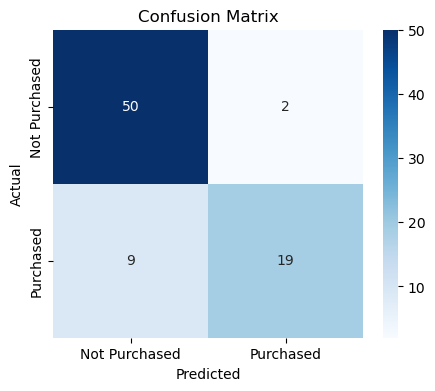

In [45]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()